# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Ananta Alfallah Tarigan
- Email: anantar437471@gmail.com
- Id Dicoding: ananta_alfallah

# Latar Belakang

Jaya Jaya Maju merupakan salah satu perusahaan multinasional yang telah berdiri sejak tahun 2000. Ia memiliki lebih dari 1000 karyawan yang tersebar di seluruh penjuru negeri. 

Walaupun telah menjadi menjadi perusahaan yang cukup besar, Jaya Jaya Maju masih cukup kesulitan dalam mengelola karyawan. Hal ini berimbas tingginya attrition rate (rasio jumlah karyawan yang keluar dengan total karyawan keseluruhan) hingga lebih dari 10%.

Untuk mencegah hal ini semakin parah, manajer departemen HR ingin meminta bantuan Anda mengidentifikasi berbagai faktor yang mempengaruhi tingginya attrition rate tersebut. Selain itu, ia juga meminta Anda untuk membuat business dashboard untuk membantunya memonitori berbagai faktor tersebut. Selain itu, mereka juga telah menyediakan dataset yang dapat Anda unduh melalui tautan berikut: Jaya Jaya Maju.

Hal yang akan dilakukan:
1. Mempersiapkan dataset (Gather, Asses, Clean)
2. Melakukan Exploratory Data Analysis (EDA) dan visualisasi, untuk menemukan insight dari data
3. Melakukan data preparation, training model, dan evaluation dengan algoritma logistic regression, SVC, dan Random Forest

## Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Menyiapkan data yang akan digunakan

## Data Understanding

In [4]:
df = pd.read_csv('employee_data.csv')
print('Shape dataset:',df.shape)
df.head()

Shape dataset: (1470, 35)


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


In [3]:
df.info()
#Attrition type float diganti int, label mempunyai missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [4]:
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [5]:
df.Attrition.value_counts()

Attrition
0.0    879
1.0    179
Name: count, dtype: int64

- Terdapat missing value yang cukup banyak (412 data) dari nilai label (Attrition).
- Nilai 0 (karyawan tidak keluar) jauh lebih banyak dari pada total nilai 1 (karyawan keluar), sehingga pengisian dengan mode (nilai 0) akan memperparah ketidakseimbangan kelas
- Baris dengan data attrition yang kosong di hilangkan/drop

In [5]:
df.dropna(inplace=True)
df['Attrition']=df.Attrition.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   int64 
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   int64 
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   int64 
 8   EducationField            1058 non-null   object
 9   EmployeeCount             1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                  105

In [7]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
df.nunique()

EmployeeId                  1058
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    731
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                991
MonthlyRate                 1038
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [9]:
df.PerformanceRating.value_counts()

PerformanceRating
3    899
4    159
Name: count, dtype: int64

- EmployeeCount, Over18, dan StandardHours akan di drop karena hanya memiliki 1 buah value yang sama untuk setiap row.
- EmployeeId di drop dikarenakan tidak dibutuhkan dalam proses analisis dan pembuatan model.
- PerformanceRating sebagai rating kepada karyawan dari nilai 1-4, hanya memiliki dua nilai di dalam dataset yakni 3 (dominan) dan 4

In [6]:
df.drop(columns=['EmployeeId','EmployeeCount', 'Over18', 'StandardHours'], inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,1,Travel_Rarely,1141,Research & Development,11,2,Medical,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,No,15,3,1,0,15,2,1,1,0,0,0
2,51,1,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Yes,12,3,3,3,18,2,4,10,0,2,7
3,42,0,Travel_Frequently,555,Sales,26,3,Marketing,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,No,14,3,4,1,23,2,4,20,4,4,8
6,40,0,Travel_Rarely,1124,Sales,1,2,Medical,2,Male,57,1,2,Sales Executive,4,Married,7457,13273,2,Yes,22,4,3,3,6,2,2,4,3,0,2
7,55,1,Travel_Rarely,725,Research & Development,2,3,Medical,4,Male,78,3,5,Manager,1,Married,19859,21199,5,Yes,13,3,4,1,24,2,3,5,2,1,4


In [11]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058,1058.000000,1058,1058.000000,1058.000000,1058,1058.000000,1058,1058.000000,1058.00000,1058.000000,1058,1058.000000,1058,1058.000000,1058.000000,1058.000000,1058,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
unique,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,746,NaN,701,NaN,NaN,436,NaN,620,NaN,NaN,NaN,232,NaN,464,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,37.055766,0.169187,NaN,809.542533,NaN,8.978261,2.879017,NaN,2.712665,NaN,65.643667,2.73724,2.090737,NaN,2.749527,NaN,6625.945180,14267.281664,2.706994,NaN,15.155955,3.150284,2.726843,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,9.410421,0.375094,NaN,408.478049,NaN,8.040608,1.031442,NaN,1.092959,NaN,20.324861,0.70473,1.136514,NaN,1.104144,NaN,4837.695042,7048.077305,2.523526,NaN,3.641097,0.357518,1.090970,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,30.000000,1.00000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,0.000000,NaN,465.250000,NaN,2.000000,2.000000,NaN,2.000000,NaN,48.000000,2.00000,1.000000,NaN,2.000000,NaN,2900.250000,8277.250000,1.000000,NaN,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,0.000000,NaN,817.500000,NaN,7.000000,3.000000,NaN,3.000000,NaN,65.000000,3.00000,2.000000,NaN,3.000000,NaN,4903.500000,14201.000000,2.000000,NaN,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,0.000000,NaN,1168.500000,NaN,13.000000,4.000000,NaN,4.000000,NaN,83.000000,3.00000,3.000000,NaN,4.000000,NaN,8736.500000,20364.000000,4.000000,NaN,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000


In [12]:
df.Attrition.value_counts()

Attrition
0    879
1    179
Name: count, dtype: int64

In [7]:
Nominal_category = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Ordinal_category = ['Education', 'EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel', 'WorkLifeBalance']
Numerik = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Label = ['Attrition']

df_attrition = df[df['Attrition'] == 1]
df_non_attrition = df[df['Attrition'] == 0]

attrition_rate = df['Attrition'].value_counts()

(-1.0999999587715776,
 1.0999998491143217,
 -1.0999998739632055,
 1.0999999939982479)

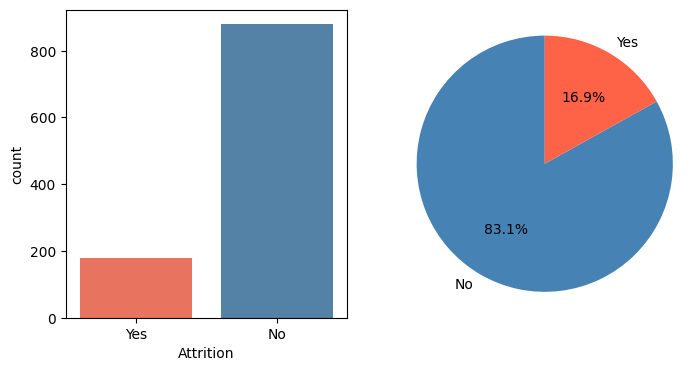

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
attrition_colors = {'No': 'steelblue', 'Yes': 'tomato'}

sns.countplot(data=df.replace({'Attrition': {0: 'No', 1: 'Yes'}}),x='Attrition', hue='Attrition', ax=ax[0], palette=attrition_colors)

ax[1].pie(attrition_rate, labels=["No","Yes"], autopct='%1.1f%%', startangle=90, colors=[attrition_colors['No'], attrition_colors['Yes']])
ax[1].set_title("", loc="center")
ax[1].axis('equal')

Dalam dataset yang telah dibersihkan ini, nilai attrition rate secara keseluruhan adalah sebesar 16.9% dari total karyawan perusahaan, yang mana angka ini cukup tinggi, sehingga dibutuhkan langkah-langkah untuk mengurangi nilai tersebut.

In [48]:
def stacked_barplot(features, df, segment_feature,attrition_colors):
    fig, ax = plt.subplots(len(features), 1, figsize=(10, 30))
    for i, feature in enumerate(features):
        counts_df = df.groupby([feature, segment_feature]).size().unstack()
        percentages_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100
        counts_df.plot(kind='bar', stacked=True, ax=ax[i], color=[attrition_colors[col] for col in counts_df.columns])
        ax[i].set_title(f'{feature} by {segment_feature}')
        ax[i].set_ylabel('')
        ax[i].set_xlabel('')
        for p, percentages_ in zip(ax[i].patches, percentages_df.values.flatten('F')):
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            count = height 
            ax[i].annotate(f'{count} ({percentages_:.1f}%)', (x + width / 2, y + height / 2),
                           ha='center', va='center', fontsize=10)

    for ax_ in ax:
        ax_.set_xticklabels(ax_.get_xticklabels(), rotation=20)

    plt.tight_layout()
    plt.show()

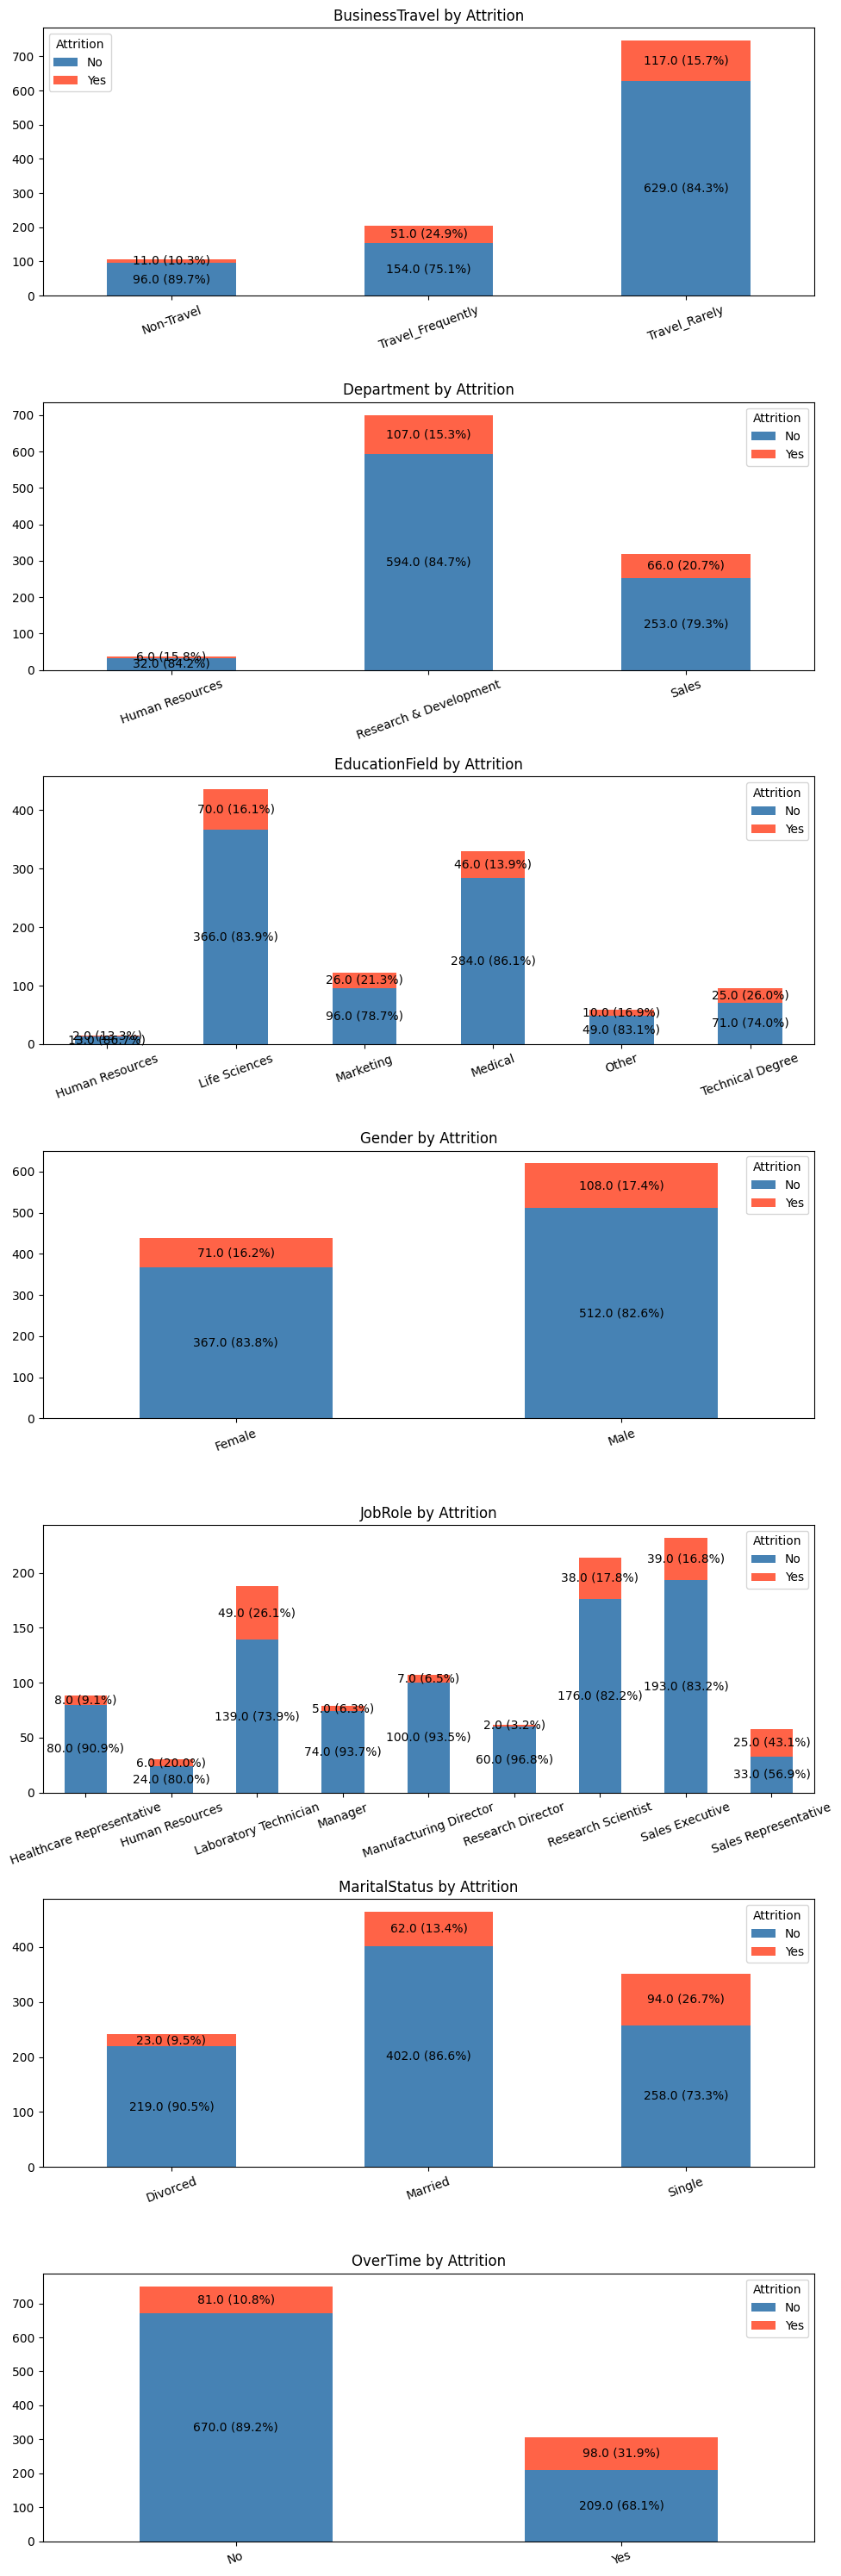

In [49]:
stacked_barplot(
    features=Nominal_category,
    df=df.replace({'Attrition': {0: 'No', 1: 'Yes'}}),
    segment_feature='Attrition',
    attrition_colors=attrition_colors
)

- Pada pengelompokan berdasarkan BusinessTravel. Kebanyakan karyawan pada perusahaan berada pada kategori Travel Rarely (nilai Attrition rate 15.7%), sedangkan terendah pada kategori Non travel (nilai Attrition rate 10.3%). Attrition rate tertinggi pada golongan yang sering melakukan perjalanan (Travel_Frequently) mendekati 25%.

- Pada pengelompokan berdasarkan Department, Attrition rate tertinggi berada pada departemen Sales (20.7%). Sedangkan R&d dengan jumlah karyawan terbanyak dan HR dengan karyawan sangat sedikit, memiliki nilai disekitaran 15%.

- Pada pengelompokan berdasarkan EducationField, Seluruh kategori memiliki Attrition rate di atas 13%, tertinggi pada kategori technical degree (26%) disusul Marketing (21.3%). Sedangkan kategori lainnya bernilai sekitaran 13-16%.

- Pada pengelompokan berdasarkan Gender, Attrition rate untuk kedua gender berada pada nilai mirip2 yakni 16% (female) dan 17%(male). Dengan jumlah karyawan pria lebih banyak sekitar 17% dari karyawan wanita.

- Pada pengelompokan berdasarkan JobRole, terjadi variasi Attrition Rate yang cukup besar dari sekitaran 3% (research director) sampai dengan 43% (Sales Representative). Kategori yang juga bernilai cukup besar, yakni Laboratory Technician (26.1%) ,HR (20%), Research Scientist (18%), dan Sales Executive (16.8%).

- Pada pengelompokan berdasarkan MaritalStatus, jumlah karyawan tertinggi berada dalam status Married hanya memiliki Attrition rate sebesar 13%. Kategori single dengan jumlah karyawan tertinggi kedua memiliki Attrition rate tertinggi hampir mencapai 27%. Karyawan berstatus divorce berjumlah paling sedikit dengan Attrition rate sebesar 9%.

- Pada pengelompokan berdasarkan Overtime, sebagian besar karyawan di perusahaan ini tidak melakukan Overtime/lembur, dan nilai Attrition ratenya hanya sebesar 10.8%. Sedangkan Nilai Atrrition rate pada karyawan yang melakukan overtime sangat tinggi mendekati 32%.

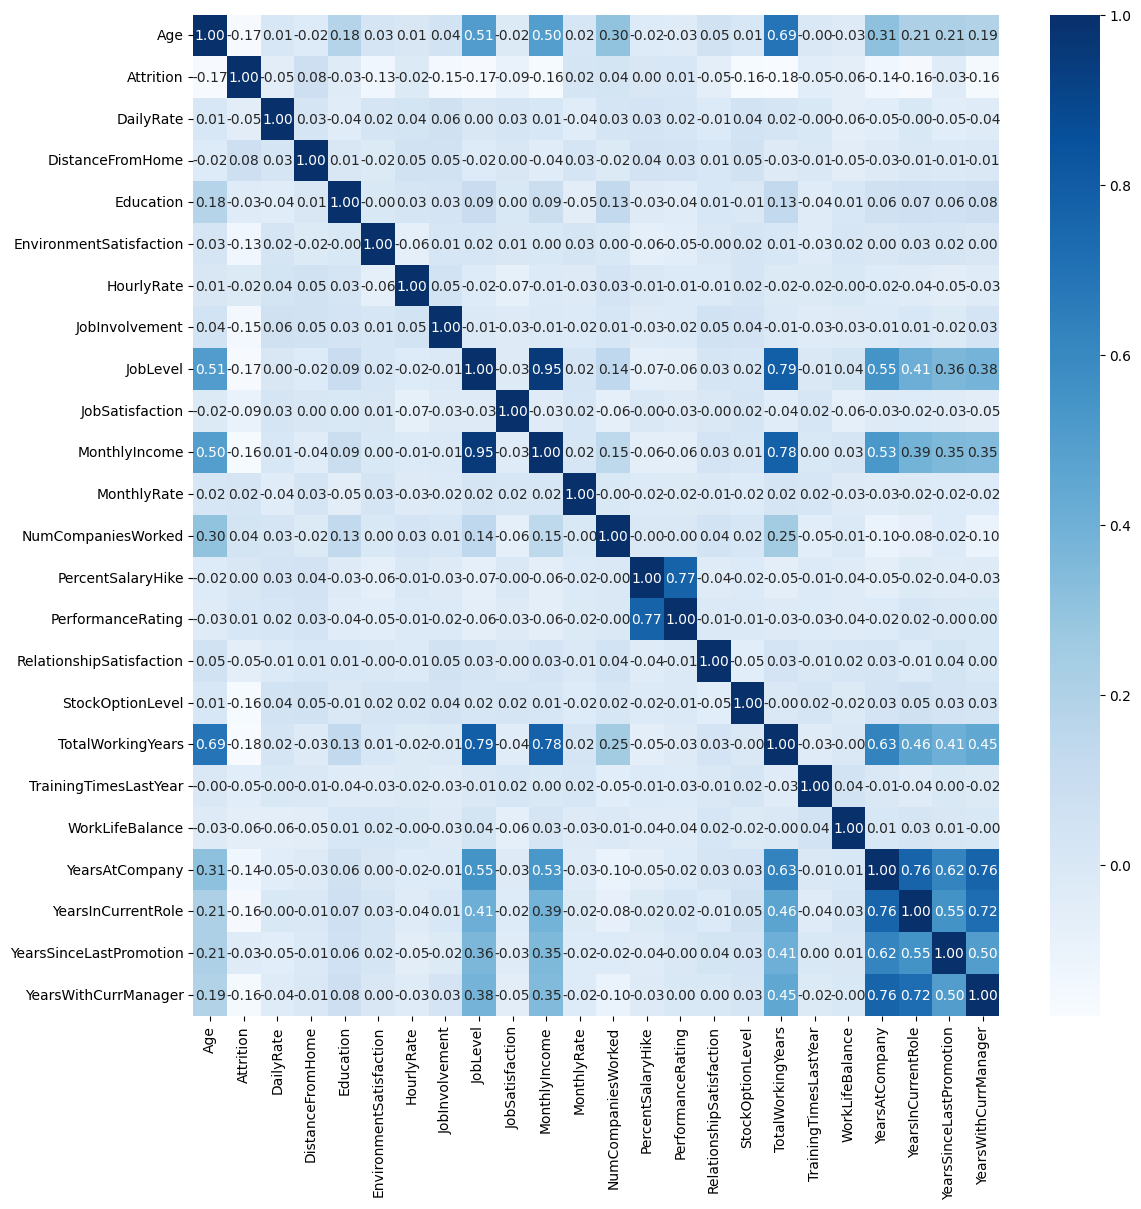

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 13))
sns.heatmap(data=df.corr(numeric_only=True), cmap='Blues', annot=True, fmt='.2f', ax=ax)
plt.show()

Beberapa korelasi yang melebihi 0.5, ditemukan pada variabel yang berhubungan dengan umur, tahun bekerja, status level pekerjaan ataupun pendapatan.

Korelasi tinggi >0.7 adalah sebagai berikut:
1. Age dan TotalWorkingYears (0.7)
2. Joblevel dan MonthlyIncome (0.95)
3. Joblevel dan TotalWorkingYears (0.79)
4. MonthlyIncome dan TotalWorkingYears (0.78)
5. PercentSalaryHike dan PerfomanceRating (0.77)
6. YearsAtCompanny dan YearsInCurrentRole (0.76)
7. YearsAtCompanny dan YearsWithCurrentManager (0.76)
8. YearsInCurrentRole dan YearsWithCurrentManager (0.76)

- Dari sini dapat diketahui bahwa variabel nilai pendapatan dan JobLevel erat kaitannya dengan variabel waktu / temporal bekerja di perusahaan 

### Analisis Employee Attrition Rate Berdasarkan Businesstravel

In [51]:
df_businesstravel = df.groupby(by=["BusinessTravel"], as_index=False).agg({
    "Attrition": (lambda x: "{:.0%}".format(x.sum() / x.count())), #Attrition Rate (%)
    "Age": ["mean", 'median', "std"],
    "DailyRate": ["mean", 'median', "std"],
    "HourlyRate": ["mean", 'median', "std"],
    "MonthlyRate": ["mean", 'median', "std"],
    "MonthlyIncome": ["mean", 'median', "std"],
    'JobLevel': (lambda x: x.mode()[0]),
    "PercentSalaryHike": 'mean',
    "NumCompaniesWorked": "mean",
    "YearsAtCompany": "mean",
    "YearsSinceLastPromotion": "mean"
})
df_businesstravel

BusinessTravel Attrition        Age                    DailyRate                    HourlyRate                     MonthlyRate                       MonthlyIncome                      JobLevel PercentSalaryHike NumCompaniesWorked YearsAtCompany YearsSinceLastPromotion
                      <lambda>       mean median       std        mean median         std       mean median        std          mean   median          std          mean  median          std <lambda>              mean               mean           mean                    mean
0         Non-Travel       10%  36.224299   36.0  8.763462  820.775701  862.0  420.343038  65.336449   67.0  20.010820  14973.457944  15480.0  7035.460843   6537.018692  5093.0  4689.888243        2         15.102804           2.710280       7.009346                2.364486
1  Travel_Frequently       25%  36.736585   35.0  8.603401  791.380488  775.0  386.763027  64.804878   64.0  19.883755  14132.780488  13782.0  7126.822850   6347.882927  4639.0  4499.048051        1         15.263415           2.507317       7.121951                2.258537
2      Travel_Rarely       16%  37.262735   36.0  9.709644  812.922252  827.0  412.930177  65.918231   66.0  20.508175  14202.954424  14237.5  7031.901607   6715.111260  4945.5  4949.940756        1         15.134048           2.761394       7.057641                2.164879

In [52]:
def numerical_dis_box_plot(features, df, segment_feature=None, showfliers=True, hue_=None):
    fig, ax = plt.subplots(len(features), 1, figsize=(8, 15))
    for i, feature in enumerate(features):
        if features:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers, hue=hue_)
            ax[i].set_title(f'{feature} by {segment_feature}')
            ax[i].set_xlabel('')
            ax[i].set_ylabel('')
            if hue_:
                ax[i].legend(loc='upper right')
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

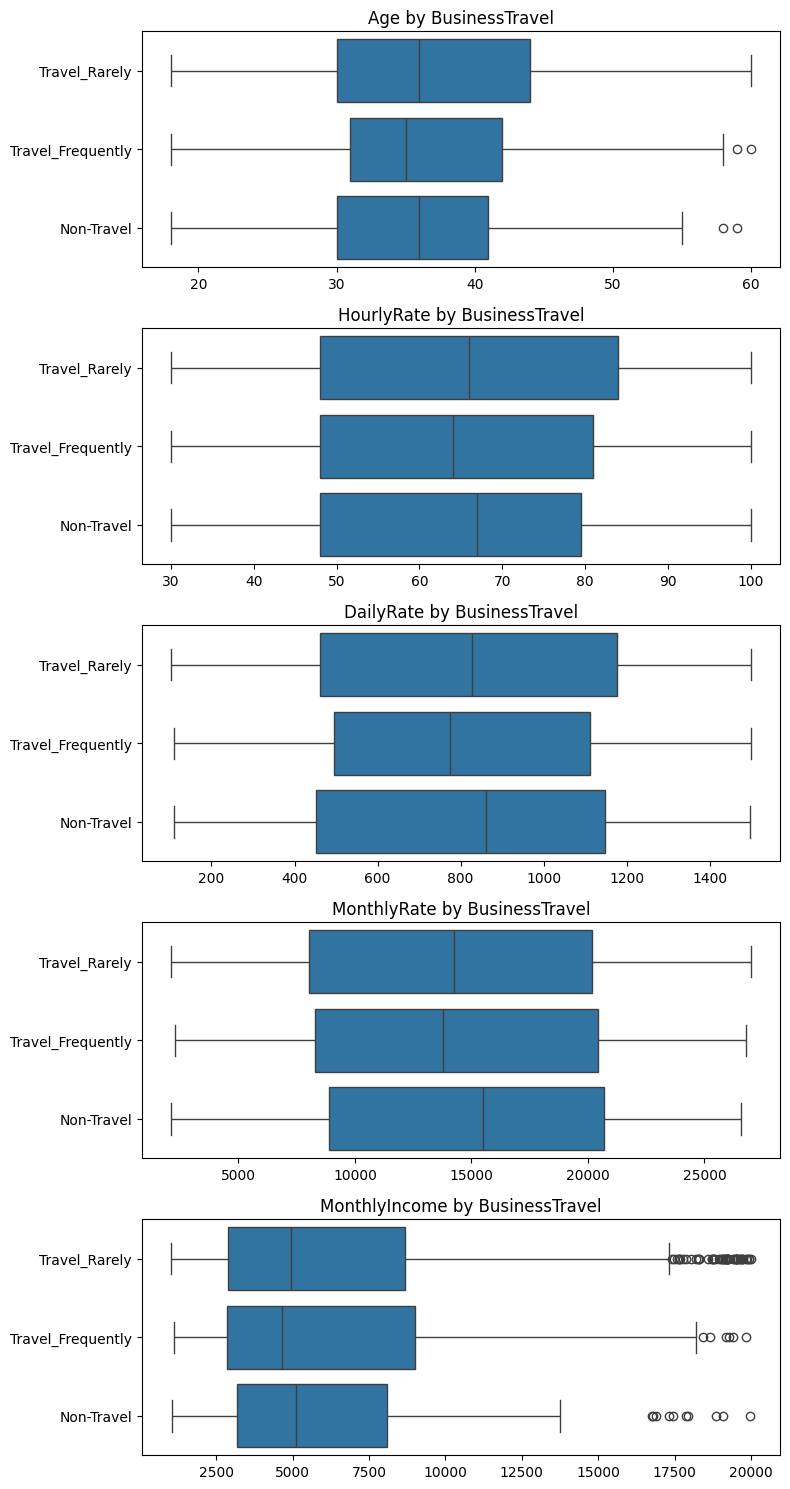

In [53]:
numerical_dis_box_plot(
    features=['Age', 'HourlyRate', 'DailyRate', "MonthlyRate", "MonthlyIncome"],
    df=df, 
    segment_feature='BusinessTravel',
)

- Tidak ada perbedaan yang signifikan dalam rataan usia di semua kategori BusinessTravel

- Berdasarkan tabel dan boxplot di atas, terdapat pola dimana tarif jaman, harian, bulanan, serta pendapatan bulanan pada kategori karyawan yang sering melakukan perjalanan memiliki rataan, median, dan standar deviasi yang lebih kecil dibanding kedua kategori lainnya. Pola yang konsisten dari ukuran tendensi sentral dan variabilitas yang lebih rendah pada kategori Travel_Frequently menunjukkan bahwa kategori ini cenderung memiliki nilai yang lebih rendah.

- Hal ini dapat menjadi indikasi mengapa attrition rate pada kategori ini lebih tinggi sekitar 9% dibandingkan kategori Travel_Rarely dan 14% lebih tinggi dibandingkan kategori non-travel

In [54]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(8,15))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

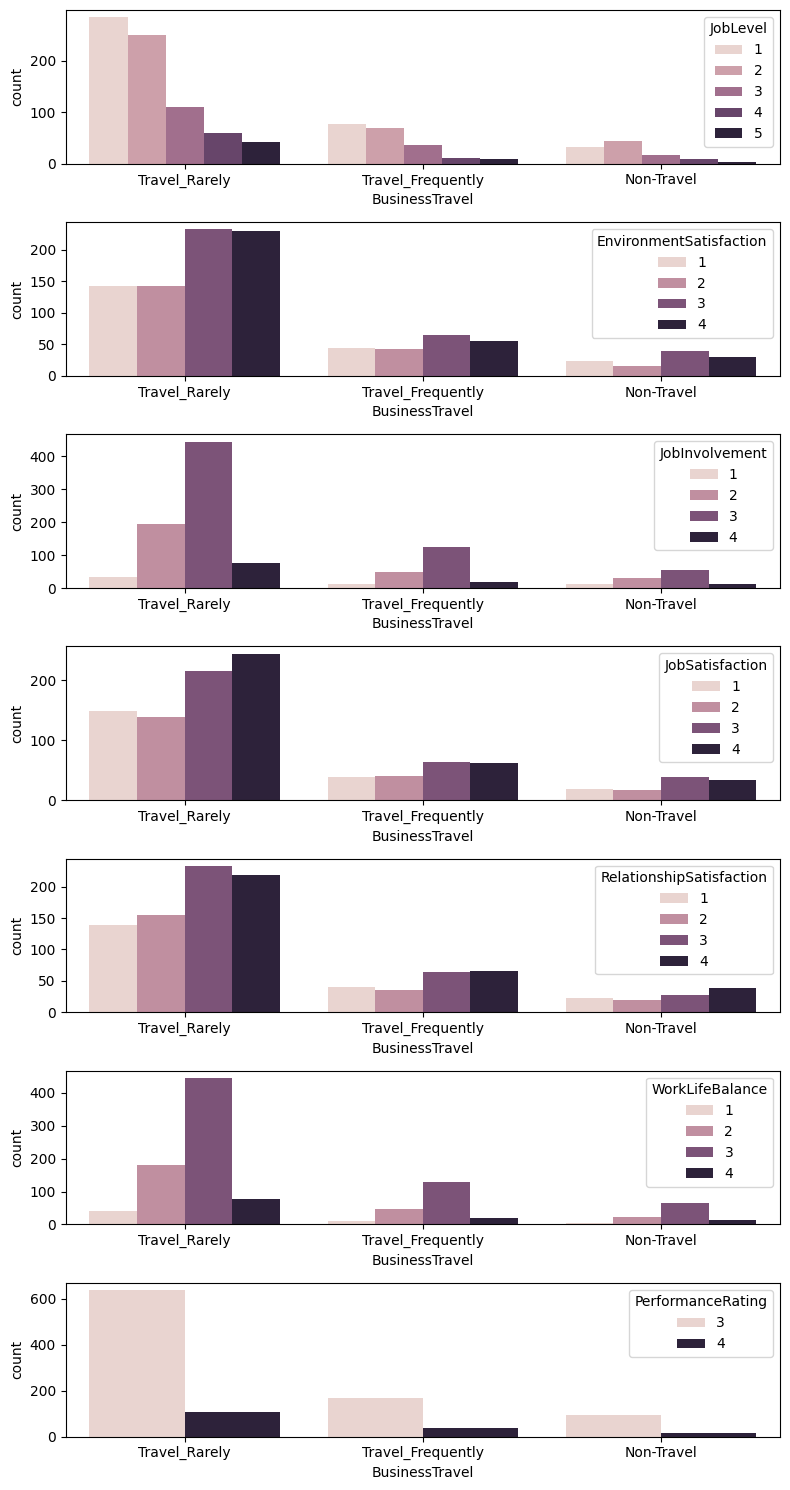

In [55]:
categorical_plot(
    features=['JobLevel', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance', 'PerformanceRating'],
    df=df, 
    segment_feature='BusinessTravel'
)

- Semua kategori memiliki pola yang serupa, sehingga tidak banyak informasi yang diperoleh lewat joblevel, job involvement, dan satisfaction rating di tiap kategori Businesstravel.

### Analisis Employee Attrition Rate Berdasarkan Departemen

In [56]:
df_department = df.groupby(by=["Department"], as_index=False).agg({
    "Attrition": (lambda x: "{:.0%}".format(x.sum() / x.count())), #Attrition Rate (%)
    "Age": ["mean", 'median', "std"],
    "DailyRate": ["mean", 'median', "std"],
    "HourlyRate": ["mean", 'median', "std"],
    "MonthlyRate": ["mean", 'median', "std"],
    "MonthlyIncome": ["mean", 'median', "std"],
    'JobLevel': (lambda x: x.mode()[0]),
    "PercentSalaryHike": 'mean',
    'TotalWorkingYears': 'mean',
    "YearsAtCompany": "mean",
    "YearsSinceLastPromotion": "mean",
    "NumCompaniesWorked": "mean"
})
df_department

Department Attrition        Age                    DailyRate                    HourlyRate                     MonthlyRate                       MonthlyIncome                      JobLevel PercentSalaryHike TotalWorkingYears YearsAtCompany YearsSinceLastPromotion NumCompaniesWorked
                           <lambda>       mean median       std        mean median         std       mean median        std          mean   median          std          mean  median          std <lambda>              mean              mean           mean                    mean               mean
0         Human Resources       16%  39.421053   38.5  9.579346  782.684211  812.5  429.100637  62.210526   57.5  21.786629  14688.657895  13926.5  7713.632689   7380.078947  4978.5  6013.283374        1         14.763158         12.815789       8.210526                2.078947           3.394737
1  Research & Development       15%  37.126961   36.0  9.428505  820.243937  833.0  405.653669  65.831669   65.0  20.259958  14157.572040  14039.0  6978.581850   6402.308131  4317.0  5058.977873        1         15.213980         11.504993       6.860200                2.151213           2.710414
2                   Sales       21%  36.617555   35.0  9.333672  789.225705  770.0  412.556479  65.639498   66.0  20.318652  14458.172414  14862.0  7134.854301   7027.551724  5902.0  4111.639844        2         15.075235         11.119122       7.379310                2.332288           2.617555

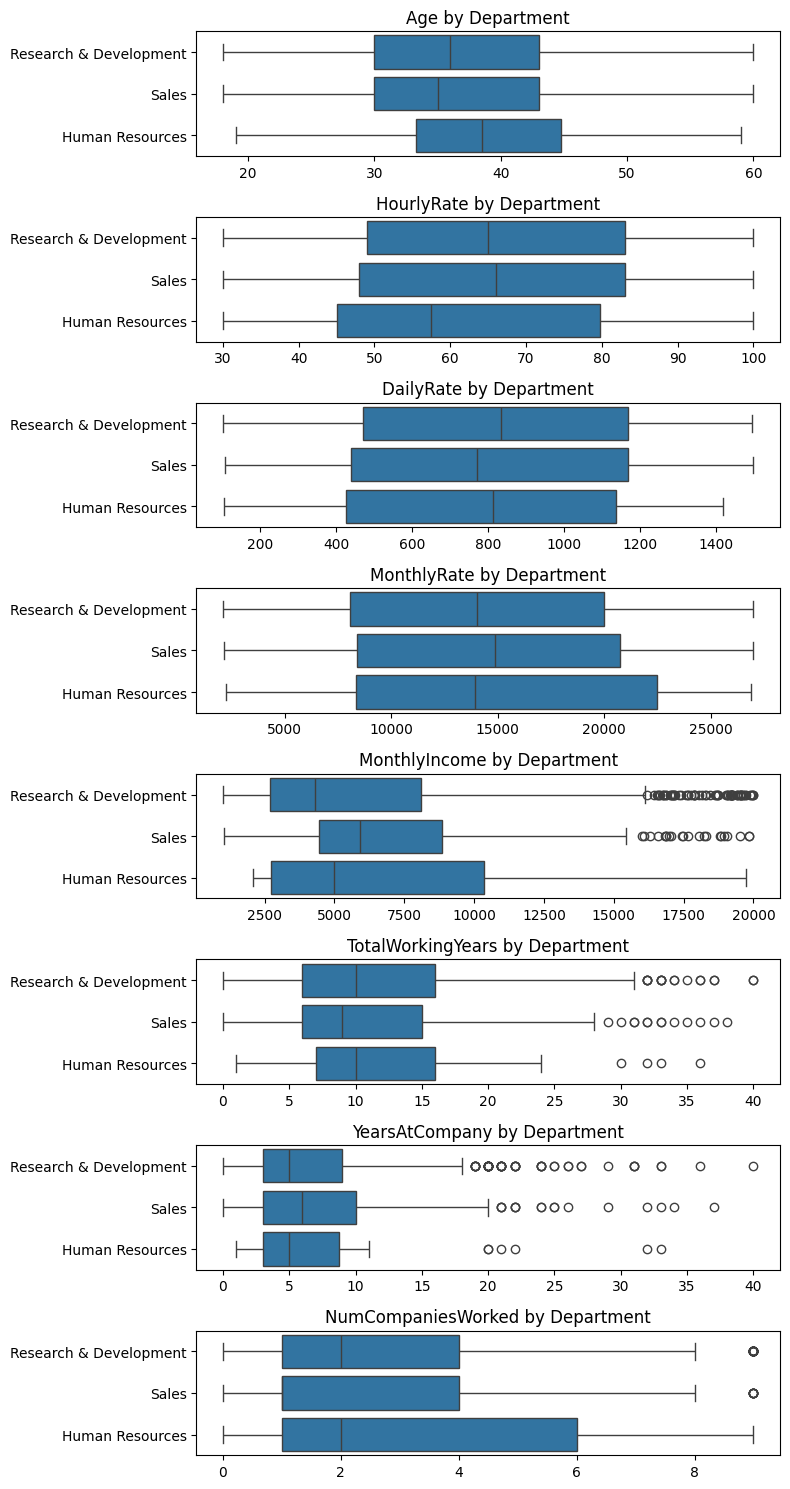

In [57]:
numerical_dis_box_plot(
    features=['Age','HourlyRate', 'DailyRate', "MonthlyRate", "MonthlyIncome", 'TotalWorkingYears', 'YearsAtCompany', 'NumCompaniesWorked'],
    df=df, 
    segment_feature='Department',
)

- Rataan dan median Usia karyawan Sales department lebih rendah dari kedua departemen lainnya, sedangkan rataan dan median usia karyawan tertinggi pada department R&D.
- Rataan MonthlyIncome tertinggi ada pada department HR, kemudian Sales, dan terakhir R&D.
- Joblevel pada department Sales didominasi oleh level 2, sedangkan pada HR dan R&D didominasi level 1.
- Kategori R&D mempunyai rataan karyawan yang lebih banyak bekerja pada berbagai perusahaan (>3 perusahaan).
- Rataan pada karyawan HR merupakan karyawan yang sudah lama berada di perusahaan (>8 tahun), sedangkan pada department R&D dan Sales kurang lebih 7 tahun tahun.

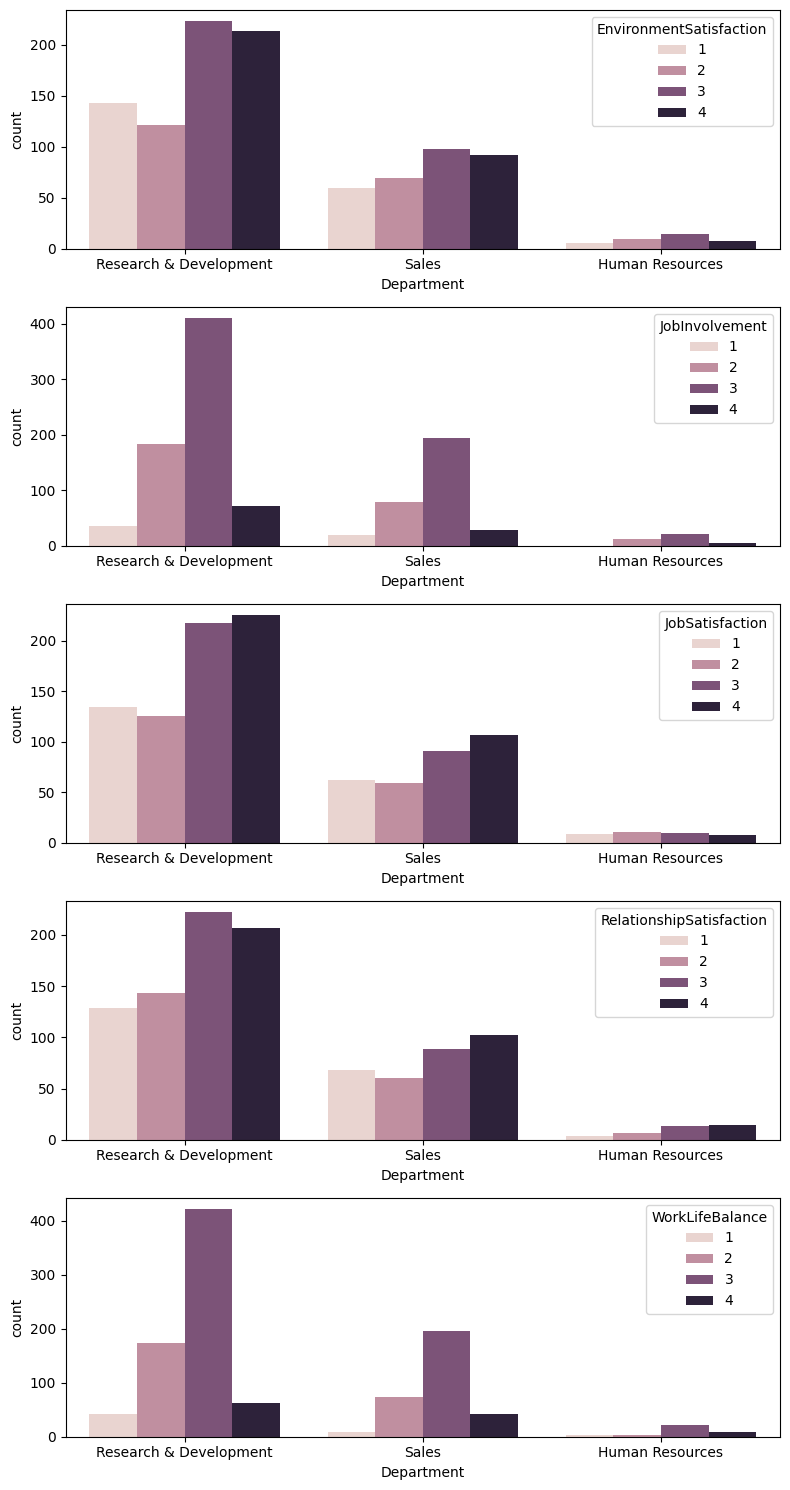

In [58]:
categorical_plot(
    features=['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance'],
    df=df, 
    segment_feature='Department'
)

- Untuk Kategori ordinal seperti EnvironmentSatisfaction, JobInvolvement, JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance memiliki pola yang mirip dengan departmen lainnya, yakni biasanya didominasi oleh nilai 3 dan 4

### Analisis Employee Attrition Rate Berdasarkan JobRole

In [59]:
df_jobrole = df.groupby(by=["JobRole"], as_index=False).agg({
    "Attrition": (lambda x: "{:.0%}".format(x.sum() / x.count())), #Attrition Rate (%)
    "Age": "mean",
    "DailyRate": "mean",
    "HourlyRate": "mean",
    "MonthlyRate": "mean",
    "MonthlyIncome": "mean",
    'JobLevel': (lambda x: x.mode()[0]),
    'TotalWorkingYears': "mean",
    "PercentSalaryHike": 'mean',
    "NumCompaniesWorked": "mean",
    "YearsAtCompany": "mean",
    "YearsSinceLastPromotion": "mean"
})
df_jobrole

,JobRole,Attrition,Age,DailyRate,HourlyRate,MonthlyRate,MonthlyIncome,JobLevel,TotalWorkingYears,PercentSalaryHike,NumCompaniesWorked,YearsAtCompany,YearsSinceLastPromotion
0,Healthcare Representative,9%,39.965909,883.079545,68.295455,13817.704545,7769.727273,2,14.750000,15.181818,2.931818,8.636364,3.079545
1,Human Resources,20%,36.800000,802.333333,61.900000,14924.266667,4573.300000,1,8.900000,15.033333,3.533333,5.633333,1.400000
2,Laboratory Technician,26%,34.079787,805.622340,65.510638,13652.074468,3240.632979,1,7.734043,15.186170,2.606383,5.021277,1.457447
3,Manager,6%,46.658228,826.341772,66.227848,14694.101266,17139.582278,4,24.341772,14.759494,2.962025,15.088608,5.253165
4,Manufacturing Director,7%,38.411215,823.186916,63.485981,14940.345794,7438.000000,2,13.074766,15.364486,2.775701,7.588785,2.065421
5,Research Director,3%,43.629032,797.064516,63.903226,15186.838710,16115.774194,3,21.354839,14.693548,3.790323,10.338710,2.709677
6,Research Scientist,18%,34.331776,805.051402,67.317757,13991.710280,3152.677570,1,7.495327,15.485981,2.359813,4.901869,1.467290
7,Sales Executive,17%,36.909483,780.961207,64.922414,14409.215517,6917.797414,2,11.193966,14.943966,2.732759,7.568966,2.482759
8,Sales Representative,43%,30.448276,810.586207,65.741379,14246.706897,2610.396552,1,4.017241,15.362069,1.810345,2.620690,0.862069


- Rataan umur terendah ada pada Sales Representatif (30 tahun), kemudian oleh Laboratory Technician dan Research Scientist (34 tahun), serta Human Resources dan Sales Executive sebesar (36 tahun).
- Ketimpangan yang besar dapat dilihat terutama pada variabel rataan MonthlyIncome dan JobLevel, yang mana kedua variabel ini berkorelasi sangat tinggi.
- Pada kolom YearsAtCompany/lamanya karyawan bekerja diperusahaan. Sales Representative merupakan JobRole dengan rataan lama bekerja paling rendah, yakni kurang dari 3 tahun, kemudian Research Scientist, Laboratory Technician, dan Human Resources disekitaran 5 tahun
- 5 kategori jobrole dengan Attrition rate tinggi (>17%): 
    1. Sales Representative (43%)
    2. Laboratory Technician (26%) 
    3. Human Resources (20%) 
    4. Research Scientist (18%)
    5. Sales Executive (17%)

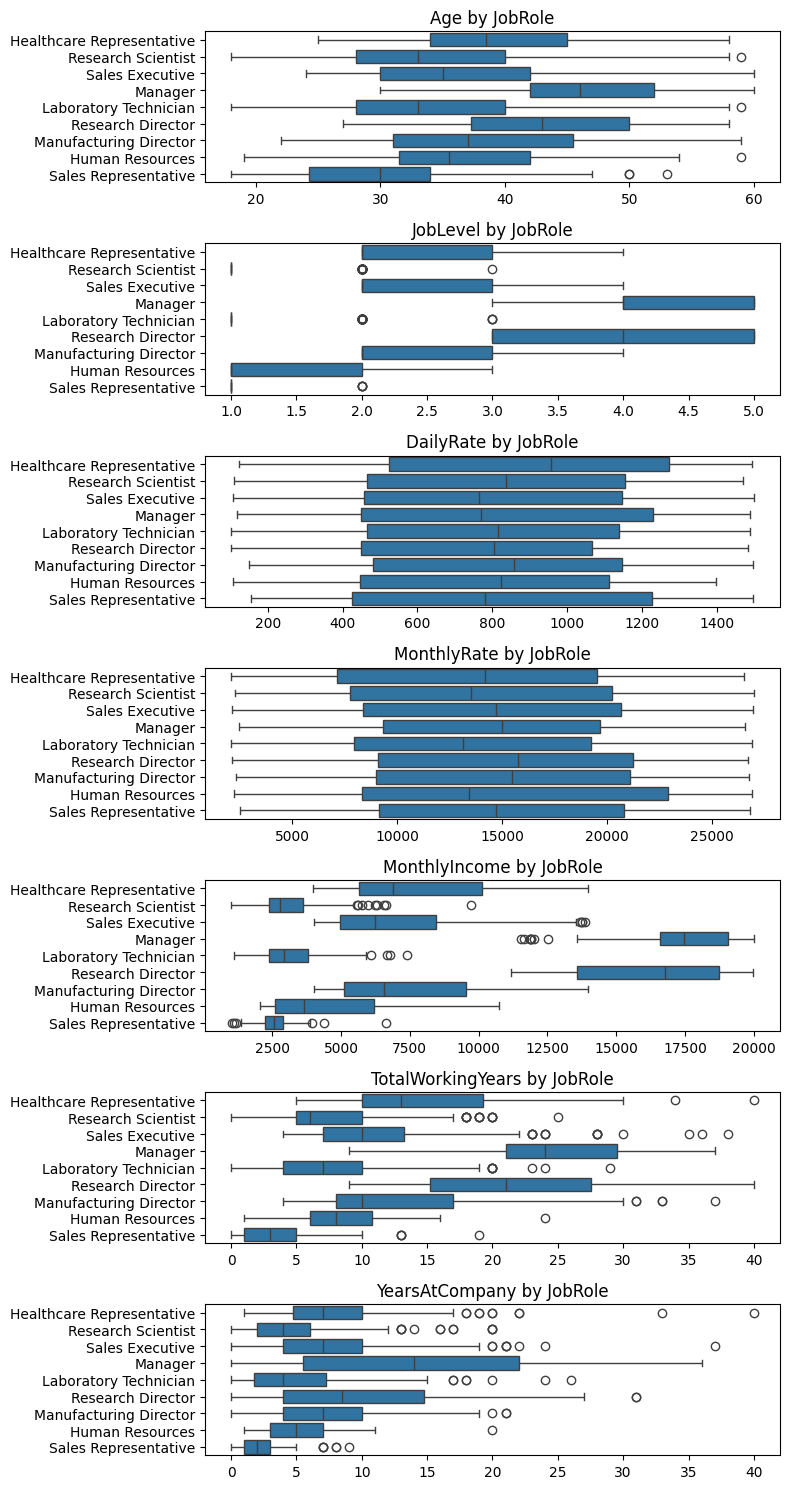

In [60]:
numerical_dis_box_plot(
    features=["Age", "JobLevel","DailyRate", "MonthlyRate", "MonthlyIncome", 'TotalWorkingYears', 'YearsAtCompany'],
    df=df, 
    segment_feature='JobRole',
)

- Sales Representative memiliki distribusi umur karyawan terendah, kemudian diikuti oleh distribusi research scientist dan laboratory technician dengan median disekitaran 32 tahun.

- Terlihat pada gambar di atas bahwa persebaran monthly income terendah ada pada jobrole dengan tingkat attrition rate tertinggi, yakni sales represntatif, yang mana nilai max monthly income ini tidak lebih dari 5000$. JobRole lainnya yang distribusinya juga berada di bawah adalah Laboratory Technician (peringkat kedua attrition rate),  Research Scientist (peringkat keempat attrition rate), dan Human Resources (peringkat ketiga attrition rate).Untuk Sales Executive memiliki persebaran sedikit lebih tinggi, akan tetapi masih di bawah kategori2 lainnya yang memiliki attrition rate rendah

- Dapat diketahui bahwa hampir seluruh karyawan pada jobrole Sales Representative, Laboratory Technician, dan Research Scientist berada dalam job level 1. Human Resources memiliki joblevel yang beragam dari 1-3 akan tetapi sebagian besarnya berada pada joblevel 1. Sedangkan Sales Exsecutive memiliki JobLevel rentang 2-4, akan tetapi modusnya pada JobLevel 1

- untuk Total working years dan years at company pada 5 JobRole dengan attrition rate tertinggi, persebarannya selalu terbawah.

In [61]:
df_jobrole_department = df.groupby(by=["JobRole", "Department"], as_index=False).agg({
    "Attrition": (lambda x: x.count()), #Attrition Rate (%)
    "Age": "mean",
    "DailyRate": "mean",
    "HourlyRate": "mean",
    "MonthlyRate": "mean",
    "MonthlyIncome": "mean",
    'JobLevel': (lambda x: x.mode()[0]),
    'TotalWorkingYears': "mean",
    "PercentSalaryHike": 'mean',
    "NumCompaniesWorked": "mean",
    "YearsAtCompany": "mean",
    "YearsSinceLastPromotion": "mean"
})
df_jobrole_department

,JobRole,Department,Attrition,Age,DailyRate,HourlyRate,MonthlyRate,MonthlyIncome,JobLevel,TotalWorkingYears,PercentSalaryHike,NumCompaniesWorked,YearsAtCompany,YearsSinceLastPromotion
0,Healthcare Representative,Research & Development,88,39.965909,883.079545,68.295455,13817.704545,7769.727273,2,14.750000,15.181818,2.931818,8.636364,3.079545
1,Human Resources,Human Resources,30,36.800000,802.333333,61.900000,14924.266667,4573.300000,1,8.900000,15.033333,3.533333,5.633333,1.400000
2,Laboratory Technician,Research & Development,188,34.079787,805.622340,65.510638,13652.074468,3240.632979,1,7.734043,15.186170,2.606383,5.021277,1.457447
3,Manager,Human Resources,8,49.250000,709.000000,63.375000,13805.125000,17905.500000,5,27.500000,13.750000,2.875000,17.875000,4.625000
4,Manager,Research & Development,42,46.190476,858.166667,63.357143,14463.880952,17269.666667,5,23.476190,14.404762,2.738095,14.357143,6.190476
5,Manager,Sales,29,46.620690,812.620690,71.172414,15272.758621,16739.896552,4,24.724138,15.551724,3.310345,15.379310,4.068966
6,Manufacturing Director,Research & Development,107,38.411215,823.186916,63.485981,14940.345794,7438.000000,2,13.074766,15.364486,2.775701,7.588785,2.065421
7,Research Director,Research & Development,62,43.629032,797.064516,63.903226,15186.838710,16115.774194,3,21.354839,14.693548,3.790323,10.338710,2.709677
8,Research Scientist,Research & Development,214,34.331776,805.051402,67.317757,13991.710280,3152.677570,1,7.495327,15.485981,2.359813,4.901869,1.467290
9,Sales Executive,Sales,232,36.909483,780.961207,64.922414,14409.215517,6917.797414,2,11.193966,14.943966,2.732759,7.568966,2.482759


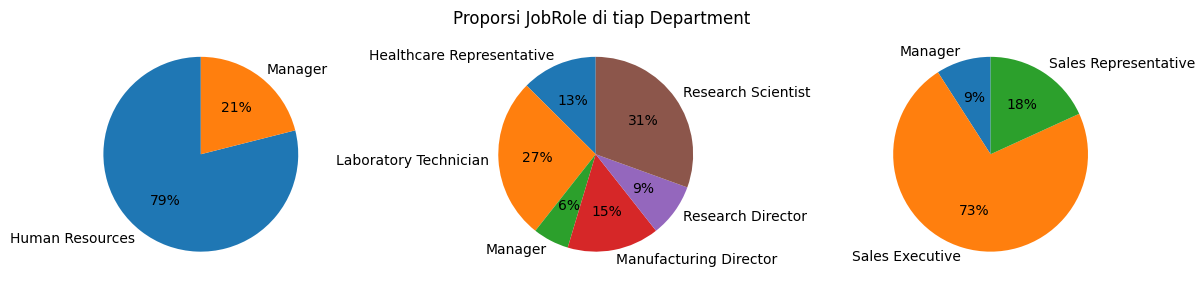

In [62]:
df_group = df.groupby(by=['Department', 'JobRole']).agg(
    Attrition_sum=('Attrition', 'sum'),
    Attrition_count=('Attrition', 'count')
).reset_index()

fig, ax = plt.subplots(1, 3, figsize=(12, 8))


ax[0].pie(df_group["Attrition_count"][0:2], labels=df_group["JobRole"][0:2].values, autopct='%1.0f%%', startangle=90)
ax[1].pie(df_group["Attrition_count"][2:8], labels=df_group["JobRole"][2:8].values, autopct='%1.0f%%', startangle=90)
ax[2].pie(df_group["Attrition_count"][8:11], labels=df_group["JobRole"][8:11].values, autopct='%1.0f%%', startangle=90)

plt.suptitle('Proporsi JobRole di tiap Department', x=0.5, y=0.66)
plt.tight_layout()
plt.show()

- Tiap department memiliki berbagai kategori dan proporsi jobrole yang berbeda2. 
- Untuk JobRole manager terdapat di ketiga department, sedangkan Jobrole lainnya, hanya terkhusus di department2 tertentu,
- Besarnya attrition rate di tiap jobrole yang hanya di miliki department tertentu, berpengaruh secara langsung pada besarnya attrition rate di department tersebut.
- Dapat diketahui pula bahwa JobRole dengan attrition rate tinggi (>17%) memiliki jumlah karyawan yang mendominasi di tiap-tiap department:
    1. HR: Human Resources
    2. R&D: Lanboratory Technician dan Research Scientist
    3. Sales: Sales Executive dan Sales Representative

### Analisis Employee Attrition Rate Berdasarkan JobLevel

In [88]:
def stacked_barplot_1feature(features, df, segment_feature, attrition_colors, label=True):
    fig, ax = plt.subplots(len(features), 1, figsize=(8, 5))
    if label:
        if attrition_colors:
            for i, feature in enumerate(features):
                counts_df = df.groupby([feature, segment_feature]).size().unstack()
                percentages_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100
                counts_df.plot(kind='bar', stacked=True, ax=ax, color=[attrition_colors[col] for col in counts_df.columns])
                ax.set_title(f'{feature} by {segment_feature}')
                ax.set_ylabel('Employee Count')
                ax.set_xlabel('')
                for p, percentages_ in zip(ax.patches, percentages_df.values.flatten('F')):
                    width, height = p.get_width(), p.get_height()
                    x, y = p.get_xy()
                    count = height 
                    ax.annotate(f'{count} ({percentages_:.0f}%)', (x + width / 2, y + height / 2),
                                ha='center', va='center', fontsize=10)

                ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
        else:
            counts_df = df.groupby([feature, segment_feature]).size().unstack()
            percentages_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100
            counts_df.plot(kind='bar', stacked=True, ax=ax)
            ax.set_title(f'{feature} by {segment_feature}')
            ax.set_ylabel('Employee Count')
            ax.set_xlabel('')
            for p, percentages_ in zip(ax.patches, percentages_df.values.flatten('F')):
                width, height = p.get_width(), p.get_height()
                x, y = p.get_xy()
                count = height 
                ax.annotate(f'{count} ({percentages_:.0f}%)', (x + width / 2, y + height / 2),
                            ha='center', va='center', fontsize=10)

            ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
    else:
        if attrition_colors:
            for i, feature in enumerate(features):
                counts_df = df.groupby([feature, segment_feature]).size().unstack()
                percentages_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100
                counts_df.plot(kind='bar', stacked=True, ax=ax, color=[attrition_colors[col] for col in counts_df.columns])
                ax.set_title(f'{feature} by {segment_feature}')
                ax.set_ylabel('Employee Count')
                ax.set_xlabel('')

                ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
        else:
            for i, feature in enumerate(features):
                counts_df = df.groupby([feature, segment_feature]).size().unstack()
                percentages_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100
                counts_df.plot(kind='bar', stacked=True, ax=ax)
                ax.set_title(f'{feature} by {segment_feature}')
                ax.set_ylabel('Employee Count')
                ax.set_xlabel('')

                ax.set_xticklabels(ax.get_xticklabels(), rotation=20)
    plt.tight_layout()
    plt.show()

In [68]:
df_group2 = df.groupby('JobLevel',).agg(
    JobRole_mode=('JobRole', (lambda x: x.mode()[0])),
    Total_Employee=('JobRole', 'count')
).reset_index()

df_group3 = df_attrition.groupby('JobLevel').agg(
    JobRole_mode=('JobRole', (lambda x: x.mode()[0])),
    Total_Employee=('JobRole', 'count')
).reset_index()

df_group2['JobRole_mode for Attrition Employee'] = df_group3['JobRole_mode']
df_group2['Total_Attrition_Employee'] = df_group3['Total_Employee']
df_group2

,JobLevel,JobRole_mode,Total_Employee,JobRole_mode for Attrition Employee,Total_Attrition_Employee
0,1,Research Scientist,394,Laboratory Technician,108
1,2,Sales Executive,364,Sales Executive,37
2,3,Sales Executive,165,Sales Executive,25
3,4,Manager,80,Sales Executive,4
4,5,Manager,55,Manager,5


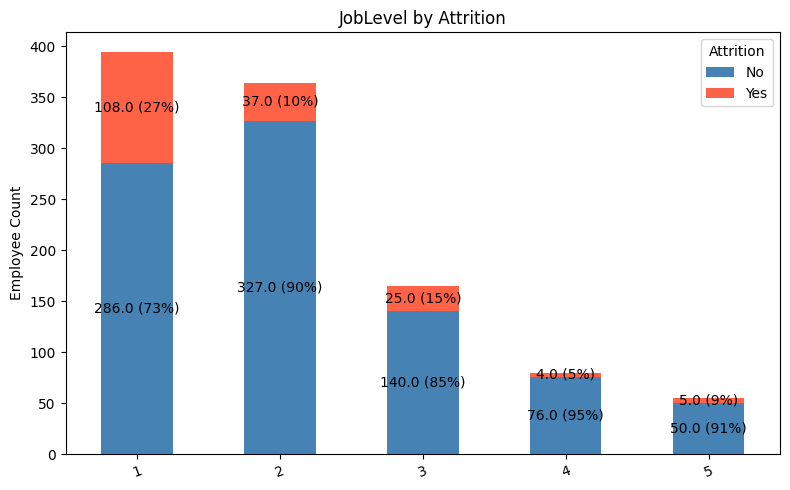

In [72]:
stacked_barplot_1feature(
    features=['JobLevel'],
    df=df.replace({'Attrition': {0: 'No', 1: 'Yes'}}),
    segment_feature='Attrition',
    attrition_colors=attrition_colors
)

- Sebagian besar karyawan di perusahaan ini berada pada JobLevel 1 dan 2
- Attrition Rate tertinggi berada pada kategori JobLevel 1 kemudian disusul level 3 dan 2
- Pada JobLevel 1, dimana sebagian besar karyawannya memiliki jobrole Research Scientist, kebanyakan karyawan yang meninggalkan perusahaan justru ada pada Karyawan Laboratory Technician
- Pada JobLevel 2 dan 3 didominasi oleh jobrole Sales Executive, yang mana jumlah karyawan perginya kebanyakan juga di JobRole ini.
- Pada JobLevel 4 yang didominasi jumlah karyawan Manager, akan tetapi yang melakukan attrition tertinggi pada JobRole Sales Executive.

In [84]:
attrition_colors = {'No': 'steelblue', 'Yes': 'tomato'}

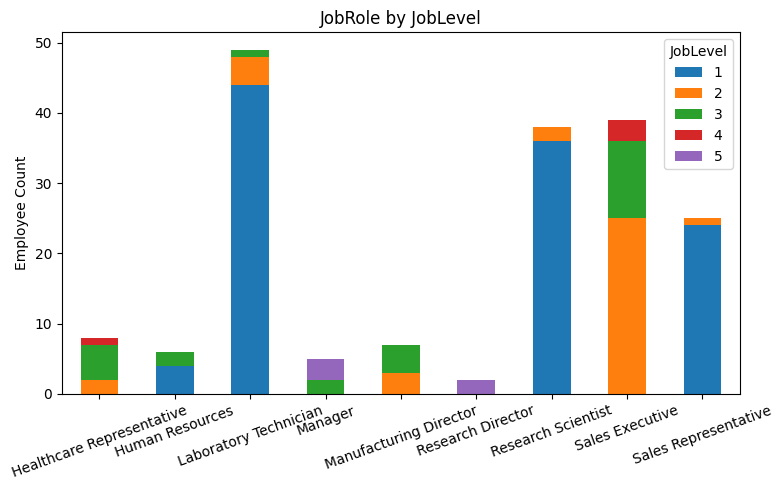

In [90]:
stacked_barplot_1feature(
    features=['JobRole'],
    df=df_attrition,
    segment_feature='JobLevel',
    label=False,
    attrition_colors=None
)
#Ini untuk karyawan attrition

- Dari 5 kategori jobrole dengan attrition rate tertinggi (17%>), ke empatnya yakni, Human Resource, Laboratory Technician, Research Scientist, dan Sales Representative, memiliki jumlah karyawan pergi didominasi oleh JobLevel 1, sedangkan untuk Sales Executive didominasi JobLevel 2.

### Analisis Employee Attrition Rate Berdasarkan Age dan Monthly Income

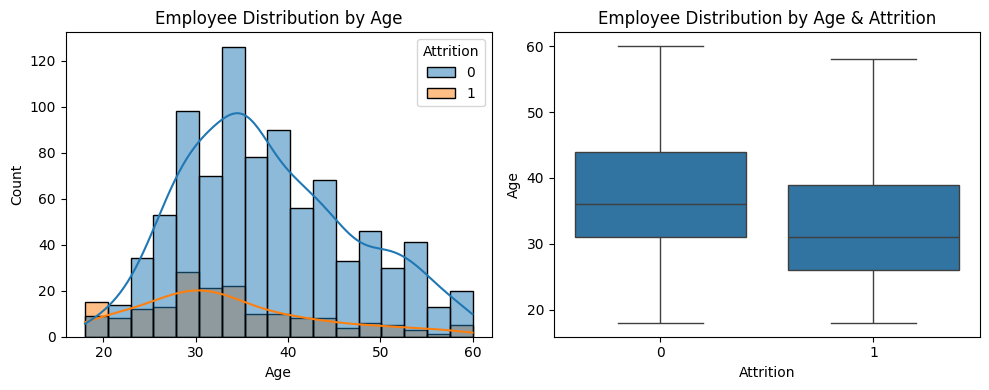

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.histplot(x="Age", hue="Attrition", data=df, kde=True, ax=ax[0])
ax[0].set_title("Employee Distribution by Age")

sns.boxplot(x="Attrition", y="Age", data=df, ax=ax[1])
ax[1].set_title("Employee Distribution by Age & Attrition")

plt.tight_layout()
plt.show()

- Terlihat dari sebaran distribusi umur, bahwa sebagian besar karyawan berada dalam rentang 30-40.
- Tren menunjukan bahwa attrition yang cukup tinggi di awal, terus meningkat sampai pada sekitaran umur 30an dan kemudian terus menurun seiring bertambahnya umur.
- Dari distribusi boxplot dan mediannya, dapat diketahui bahwa umur karyawan yang meninggalkan perusahaan kebanyakan lebih rendah dari pada karyawan yang tidak. Ini menunjukan indikasi bahwa karyawan berumur rendah lebih berpotensi meninggalkan perusahaan

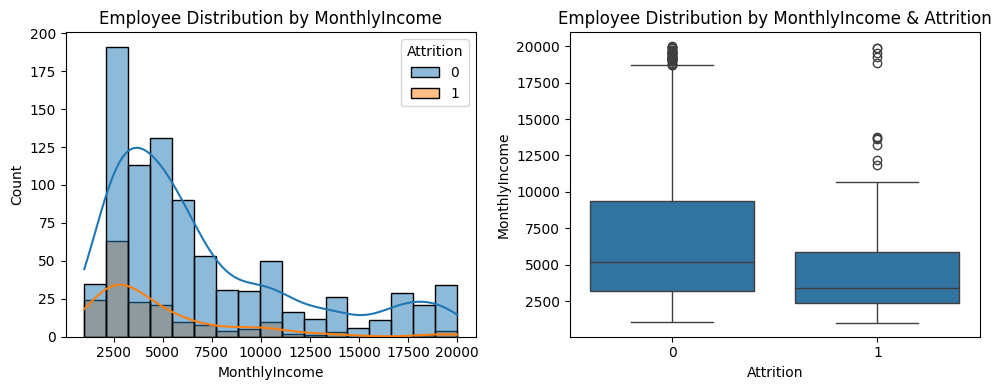

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.histplot(x="MonthlyIncome", hue="Attrition", data=df, kde=True, ax=ax[0])
ax[0].set_title("Employee Distribution by MonthlyIncome")

sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, ax=ax[1])
ax[1].set_title("Employee Distribution by MonthlyIncome & Attrition")

plt.tight_layout()
plt.show()

- Terlihat dari sebaran distribusi monthly income, bahwa kebanykan karyawan memiliki pendapatan bulanan di bawah 8000.
- Kebanyakan karyawan yang attrition adalah karyawan dengan nomimal monthly income rendah, sehingga semakin tinggi monthly income maka attrition akan semakin berkurang

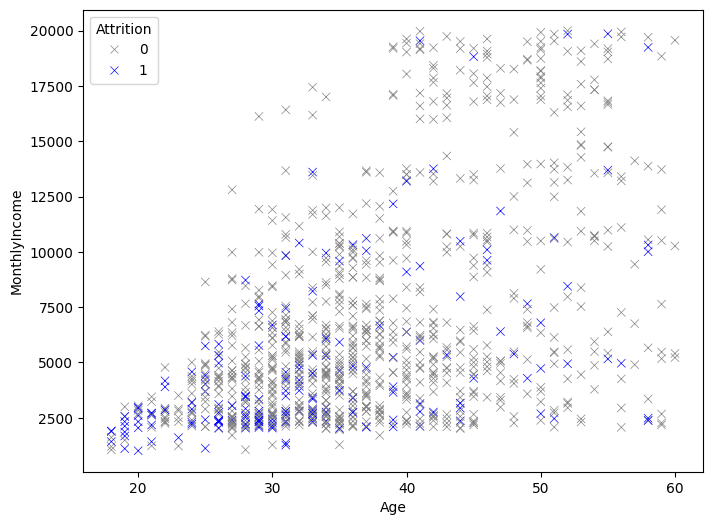

In [93]:
attrition_colors = {0: 'grey', 1: 'blue'}
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, 
                x="Age", 
                y="MonthlyIncome", 
                hue="Attrition",
                palette=attrition_colors,
                marker='x'
                )

plt.show()

In [94]:
print('Total Attrition pada Age <= 40 dan MonthlyIncome <= 8000:',df[(df["MonthlyIncome"]<=8000) & (df["Age"]<=40) & (df["Attrition"]==1)].shape[0])
print('Total Attrition peseluruhan:',df_attrition.shape[0])

Total Attrition pada Age <= 40 dan MonthlyIncome <= 8000: 126
Total Attrition peseluruhan: 179


Kebanyakan karyawan attrition memiliki age dan monthly income yang rendah. Sebanyak 126 atau 70% dari total karyawan yang melakukan attrition, berada pada Age <= 40 dan MonthlyIncome <= 8000

## Kesimpulan dari Analisis Dataset

#### Analisis Employee Attrition Rate Berdasarkan Businesstravel
Kebanyakan karyawan di Perusahaan merupakan karyawan yang jarang melakukan perjalanan (Travel Rarely), akan tetapi Attrition rate tertinggi ada pada golongan yang sering melakukan perjalanan (Travel_Frequently). Hourly rate, Daily rate, Monthly rate, dan Monthly Income pada karyawan Travel Frequently secara statistik memiliki nilai yang cenderung lebih rendah dari 2 kategori lainnya. Sehingga secara garis besar dapat diketahui bahwa potensi attrition berada pada kategori yang sering melakukan perjalanan, kemudian disusul yang jarang melakukan perjalanan (karyawan terbanyak), dan terakhir pada kategori yang tidak melakukan perjalanan.
#### Analisis Employee Attrition Rate Berdasarkan Departemen
Department R&D merupakan department dengan jumlah karyawan terbanyak, disusul oleh Sales yang memiliki Attrition Rate tertinggi, dan terakhir HR dengan jumlah karyawan tidak lebih dari 40. Pola pendapatan dari ketiga department tidak berbeda jauh satu sama lainnya, akan tetapi rataan dan median dari Usia karyawan Sales department lebih rendah dari kedua departemen lainnya, begitupun dengan total working years-nya. Menunjukan bahwa kebanyakan karyawan di Sales 
Secara garis besar keseluruhan department memiliki attrition rate yang tinggi di atas 15%, serta Department Sales dengan attrition rate tertinggi, tidak memiliki hubungan yang jelas dengan pendapatan karyawannya. Oleh karena itu pengelompokan berdasarkan department ini tidak dapat mengidentifikasi pola apa yang menjadi penyebab attrition meningkat. Asumsi yang diketahui adalah tiap department diisi oleh proporsi JobRole tertentu, sehingga Department Sales lebih tinggi attrition ratenya karena memiliki 90% karyawan dari JobRole dengan attrition rate tinggi (Sales Representatif dan Sales Executive).
#### Analisis Employee Attrition Rate Berdasarkan JobRole
Dari 9 JobRole yang ada dengan jumlah karyawan yang beragam di perusahaan, terdapat 5 JobRole yang memiliki nilai Attrition Rate (ATR) yang jauh lebih besar dibanding lainnya, yakni Sales Representative (ATR 43%), Laboratory Technician (ATR 26%), Human Resource (ATR 20%), Research Scientist (ATR 18%), dan Sales Executive (ATR 17%). Seluruh 5 JobRole ini memiliki rataan untuk usia dan TotalworkingYears yang lebih rendah dari lainnya, serta tiga dari kelimanya merupakan JobRole dengan jumlah karyawan terbanyak. 
Terdapat pola kesenjangan nilai yang tinggi pada MonthlyIncome di tiap JobRole, dimana Sales Representatif memiliki rataan monthly income terendah (<3000), diikuti oleh JobRole dengan Attrition rate yang tinggi lainnya. Rataan umur terendah ada pada Sales Representatif 30 tahun, kemudian oleh Laboratory Technician dan Research Scientist 34 tahun, serta Human Resources dan Sales Executive sebesar 36 tahun. Menurut faktor years at company dan total working years. Ke empat Jobrole tertinggi ini juga memiliki nilai statistic yang rendah, dengan Sales Representative dengan rataan lama bekerja paling rendah, yakni kurang dari 3 tahun, kemudian Research Scientist, Laboratory Technician, dan Human Resources disekitaran 5 tahun
Secara garis besar ke 5 JobRole dengan attrition rate tertinggi ini memiliki pola karyawan dengan statistik usia rendah, JobLevel rendah, monthlyincome rendah, dan total working years yang rendah. Dari faktor-faktor tadi, Sales Excecutive memiliki nilai statistik yang cukup lebih baik dibanding ke empat lainnya, serta dengan nilai Attrition rate terendah dibanding yang lainnya. Asumsinya adalah karyawan-karyawan muda dengan joblevel, pendapatan, dan pengalaman kerja rendah cenderung lebih berpotensi melakukan Attrition. Poin lain adalah untuk Sales Representatif dan Human Resource, sebagai JobRole dengan jumlah karyawan terendah perlu perhatian lebih agar tidak kehilangan sabegian besar karyawan pada JobRole tersebut.
#### Analisis Employee Attrition Rate Berdasarkan JobLevel
Sebagian besar karyawan di perusahaan ini berada pada JobLevel 1 dan 2, sedangkan Attrition Rate tertinggi berada pada kategori JobLevel 1. Sebagian besar karyawan pada level 1 memiliki JobRole Research Scientist. Pada karyawan yang meninggalkan di JobLevel 2,3, dan 4 sebagian besar adalah Sales Executive. Fokus pada penyelesaian masalah attrition harus di fokuskan di joblevel 1 (ATR 27%) yang merupakan mayoritas level karyawan yang melakukan atrisi. Kemudian di fokuskan pada level 3 (ATR 15%) yang mayoritas karyawannya merupakan Sales Executive.
#### Analisis Employee Attrition Rate Berdasarkan Age dan Monthly Income
Karyawan yang bekerja di perusahaan ini memiliki umur min 18 dan maks 60 tahun, dengan sebagian besar distribusinya berada di antara 25-40 tahun dan rataannya 37 tahun. Untuk variabel monthly income juga memiliki pola serupa, dimana sebagian besarnya berada karyawan perusahaan memiliki monthly income pada rentang cukup rendah di rentang 2k-8k, dan rataannya sebesar 6.6k. Secara distribusi dan rataan untuk karyawan Attrition, memiliki umur dan monthly income yang lebih rendah dari pada total karyawan di perusahaan, yakni sebesar 33 tahun dan 4.9k. Dengan ini diketahui kecenderungan attrition ada pada karyawan yang memiliki umur dan gaji rendah.

#### Analisis Employee Attriton Rate berdasarkan status married
Secara keseluruhan jumlah karyawan tertinggi berada dalam status Married hanya memiliki Attrition rate sebesar 13%. Kategori single dengan jumlah karyawan tertinggi kedua memiliki. Attrition rate tertinggi hampir mencapai 27%. Karyawan berstatus divorce berjumlah paling sedikit dengan Attrition rate sebesar 9%.


## Data Preparation / Preprocessing

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EnvironmentSatisfaction   1058 non-null   int64 
 9   Gender                    1058 non-null   object
 10  HourlyRate                1058 non-null   int64 
 11  JobInvolvement            1058 non-null   int64 
 12  JobLevel                  1058 non-null   int64 
 13  JobRole                   1058 non-null   object
 14  JobSatisfaction           105

In [8]:
X = df.drop(columns='Attrition')
y = df.Attrition

In [9]:
X_encoded = pd.get_dummies(X, columns=Nominal_category, dtype=int)
X_encoded

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1,37,1141,11,2,1,61,1,2,2,4777,14382,5,15,3,1,0,15,2,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2,51,1323,4,4,1,34,3,1,3,2461,10332,9,12,3,3,3,18,2,4,10,0,2,7,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,42,555,26,3,3,77,3,4,2,13525,14864,5,14,3,4,1,23,2,4,20,4,4,8,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
6,40,1124,1,2,2,57,1,2,4,7457,13273,2,22,4,3,3,6,2,2,4,3,0,2,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
7,55,725,2,3,4,78,3,5,1,19859,21199,5,13,3,4,1,24,2,3,5,2,1,4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,28,1366,24,2,2,72,2,3,1,8722,12355,1,12,3,1,0,10,2,2,10,7,1,9,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0
1465,38,168,1,3,3,81,3,3,3,7861,15397,4,14,3,4,0,10,4,4,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1467,28,1485,12,1,3,79,3,1,4,2515,22955,1,11,3,4,0,1,4,2,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1468,40,458,16,2,3,74,3,1,3,3544,8532,9,16,3,2,1,6,0,3,4,2,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)
#menggunakan stratify=y untuk memastikian proporsi data train dan test sesuai data awal

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling dengan Logistic Regression, SVC, dan Random Forest

In [123]:
model1 = LogisticRegression()
model1.fit(X_train_scaled, y_train)

model2 = SVC(kernel='linear')
model2.fit(X_train_scaled, y_train)

model3= RandomForestClassifier()
model3.fit(X_train_scaled, y_train)

RandomForestClassifier()

## Evaluation

In [124]:
print('=========================================================================')
print('Logistic Regression Model\n')
y_pred1 = model1.predict(X_test_scaled)

accuracy1 = accuracy_score(y_test, y_pred1)
report1 = classification_report(y_test, y_pred1)
confusion1 = confusion_matrix(y_test, y_pred1)

print(f"Confusion Matrix:\n{confusion1}")
print(f'Accuracy: {accuracy1}')
print(f'Classification Report:\n{report1}')

print('=========================================================================')
print('SVC Model\n')
y_pred2 = model2.predict(X_test_scaled)

accuracy2 = accuracy_score(y_test, y_pred2)
report2 = classification_report(y_test, y_pred2)
confusion2 = confusion_matrix(y_test, y_pred2)

print(f"Confusion Matrix:\n{confusion2}")
print(f'Accuracy: {accuracy2}')
print(f'Classification Report:\n{report2}')

print('=========================================================================')
print('Random Forest Model\n')
y_pred3 = model3.predict(X_test_scaled)

accuracy3 = accuracy_score(y_test, y_pred3)
report3 = classification_report(y_test, y_pred3)
confusion3 = confusion_matrix(y_test, y_pred3)

print(f"Confusion Matrix:\n{confusion3}")
print(f'Accuracy: {accuracy3}')
print(f'Classification Report:\n{report3}')

Logistic Regression Model

Confusion Matrix:
[[167   9]
 [ 18  18]]
Accuracy: 0.8726415094339622
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       176
           1       0.67      0.50      0.57        36

    accuracy                           0.87       212
   macro avg       0.78      0.72      0.75       212
weighted avg       0.86      0.87      0.87       212

SVC Model

Confusion Matrix:
[[169   7]
 [ 18  18]]
Accuracy: 0.8820754716981132
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       176
           1       0.72      0.50      0.59        36

    accuracy                           0.88       212
   macro avg       0.81      0.73      0.76       212
weighted avg       0.87      0.88      0.87       212

Random Forest Model

Confusion Matrix:
[[174   2]
 [ 30   6]]
Accuracy: 0.8490566037735849
Classification Report:
        

- Akurasi ketiga model memiliki nilai yang mirip yakni 0.882 (SVC), 0.873 (Linear Regression), dan 0.849 (Random Forest). Akan tetapi nilai Precision, Recall, and F1-score untuk memprediksi attrition (nilai 1) cukup bervariasi untuk ketiga model.
    1. Presisi mengukur proporsi kasus positif yang diprediksi secara tepat dari seluruh kasus positif yang diprediksi. Model Random Forest mencapai presisi tertinggi untuk kasus positif (0,75), diikuti oleh Regresi Logistik (0,67), dan SVC (0,72).
    2. Recall mengukur proporsi kasus positif yang diprediksi dengan tepat dari seluruh kasus positif aktual. Model Regresi Logistik memiliki recall tertinggi untuk kasus positif (0,50), diikuti oleh SVC (0,50), dan Random Forest (0,17).
    3. Skor F1 adalah rata-rata harmonis dari presisi dan recall, memberikan keseimbangan antara kedua metrik tersebut. Model SVC mencapai skor F1 tertinggi untuk kasus positif (0,59), diikuti oleh Regresi Logistik (0,57), dan Random Forest (0,27).

- Model SVC tampaknya memiliki performa terbaik di antara ketiga model berdasarkan akurasi dan skor F1, yang menunjukkan keseimbangan yang baik antara presisi dan perolehan. 

- Secara keseluruhan, model memiliki akurasi, presisi, dan recall yang relatif tinggi untuk kelas 0 (kelas negatif), namun recall dan presisi yang lebih rendah untuk kelas 1 (kelas positif). Hal ini menunjukkan bahwa model berperforma baik dalam mengidentifikasi instance kelas 0 tetapi lebih kesulitan dengan kelas 1. 

- Analisis lebih lanjut mungkin diperlukan untuk meningkatkan performa model, terutama dengan meingkatkan jumlah sampel dataset untuk mengurangi ketidak seimbangan kelas antara karyawan Attrition (0) dan tidak (1).  Dalam kasus sekarang ini kita kehilangan hampir sepertiga sampel data dikarenkan adanya 412 missing value pada label attrition karyawan. Selain itu penggunaan algoritma lainnya, serta rekayasa fitur juga mungkin dibutuhkan untuk meningkatkan performa model menjadi lebih baik.

In [125]:
# Menyimpan model
dump(model1, 'Attrition_logistic_regression_model.joblib')
dump(model2, 'Attrition_svm_model.joblib')
dump(model3, 'Attrition_randomforest.joblib')

['Attrition_randomforest.joblib']

In [11]:
# Menyimpan scaler untuk digunakan kembali
dump(scaler, 'scaler.pkl')

['scaler.pkl']